# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\enron_spam_data.csv")

In [3]:
df

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [4]:
df.describe()

,Message ID
count,33716.000000
mean,16857.500000
std,9733.115174
min,0.000000
25%,8428.750000
50%,16857.500000
75%,25286.250000
max,33715.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


## Handle missing values

In [6]:
df.isna().sum()

Message ID      0
Subject       289
Message       371
Spam/Ham        0
Date            0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Message ID    0
Subject       0
Message       0
Spam/Ham      0
Date          0
dtype: int64

In [9]:
df

,Message ID,Subject,Message,Spam/Ham,Date
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [10]:
df.columns

Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')

In [11]:
df['Spam/Ham'].value_counts()

spam    16614
ham     16493
Name: Spam/Ham, dtype: int64

## Make the Count Vectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(ngram_range=(1,4), stop_words='english', strip_accents='unicode', max_features=10000)

In [13]:
bow = count.fit_transform(df['Spam/Ham'])

In [14]:
bow

<33107x2 sparse matrix of type '<class 'numpy.int64'>'
	with 33107 stored elements in Compressed Sparse Row format>

In [15]:
bow.toarray()

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

# Innitialize the model

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [17]:
df['label'] = df['Spam/Ham'].map({
    'ham':1,
    'spam':0
})

In [18]:
df

,Message ID,Subject,Message,Spam/Ham,Date,label
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,1
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,1
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,1
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,1
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14,1
...,...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29,0
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29,0
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30,0
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30,0


## Asign features

In [19]:
x = df[['Subject','Message']]
y = df.label

In [20]:
x

,Subject,Message
1,"vastar resources , inc .","gary , production from the high island larger ..."
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc
3,re : issue,fyi - see note below - already done .\nstella\...
4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...
5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ..."
...,...,...
33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np..."
33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...
33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...
33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...


In [21]:
y

1        1
2        1
3        1
4        1
5        1
        ..
33711    0
33712    0
33713    0
33714    0
33715    0
Name: label, Length: 33107, dtype: int64

## Transform the features

In [22]:
x = count.fit_transform(df.Message, df.Subject)

## Make training and testing sets

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=42)

## Train the model

In [24]:
model.fit(x_train,y_train)

MultinomialNB()

In [25]:
y_pred = model.predict(x_test)

## Check accuracy and evaluate further if necessary

In [26]:
from sklearn import metrics

In [27]:
metrics.accuracy_score(y_pred,y_test)

0.973421926910299

<Axes: >

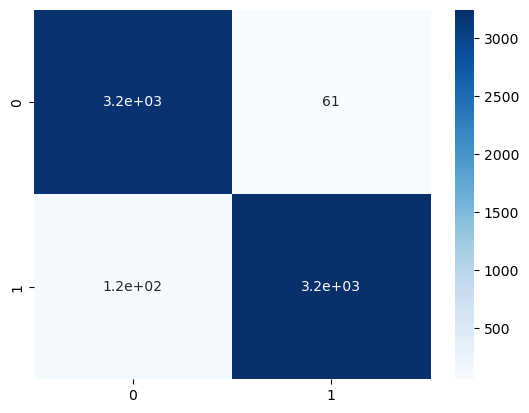

In [28]:
sns.heatmap(metrics.confusion_matrix(y_pred,y_test), annot=True, cmap='Blues')